In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import lin_Fit as lf
import pandas as pd
from lib5 import quad, getV, getM_a
from scipy.stats import chi2, norm
from math import e
import scipy.integrate as integrate
def mynorm(x, mu, sigma):
    return (1/(np.sqrt(2*np.pi)*sigma**2))*e**(-(x-mu)**2/(2*sigma**2))

# Estrarre $a_i$

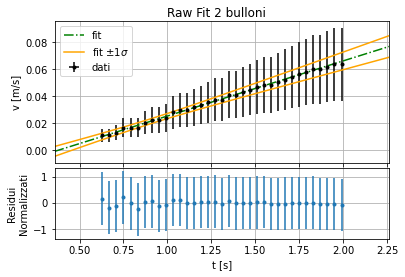

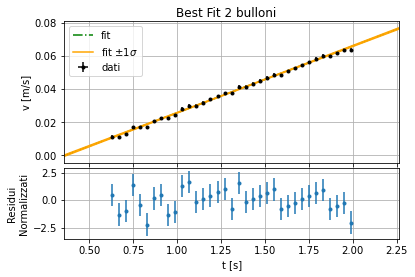

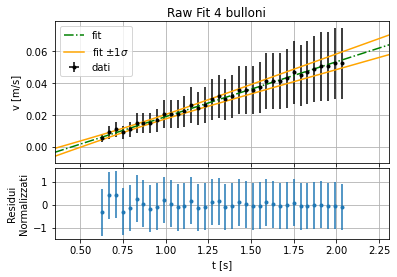

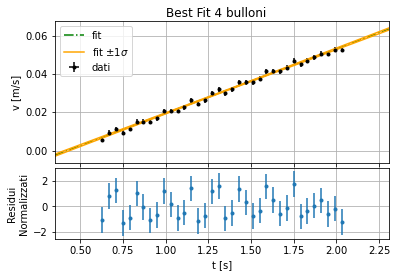

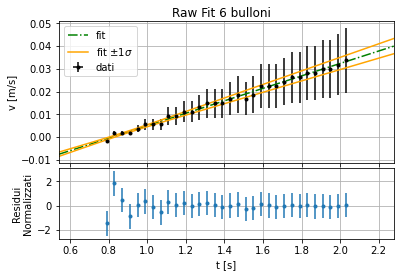

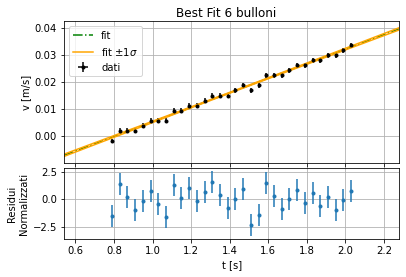

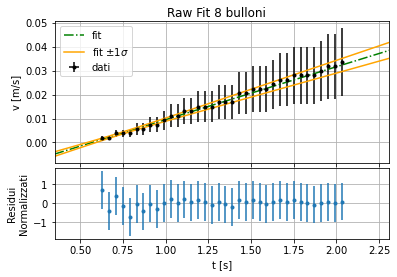

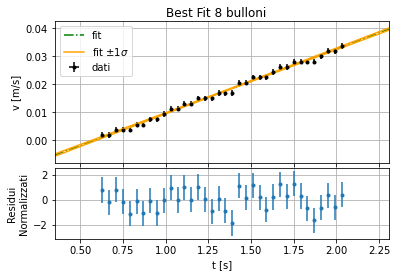

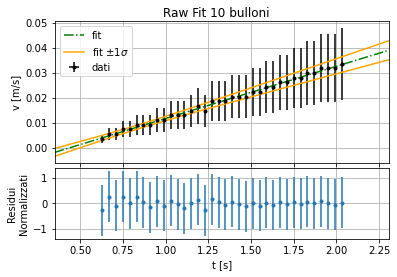

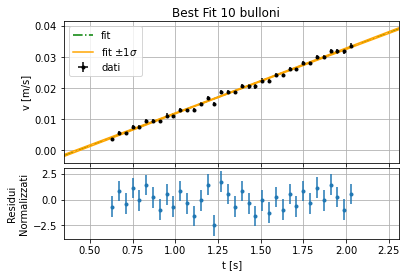

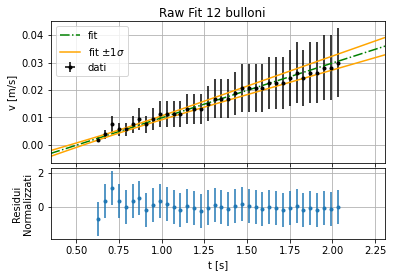

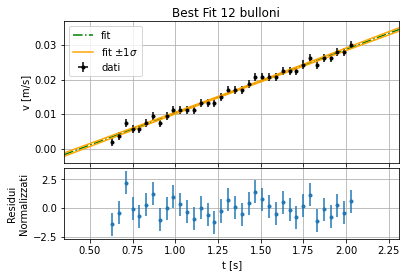

In [2]:
#setup grafici
fig1 = plt.figure(1)
fig2 = plt.figure(2)
ls = ['-','--','-.',':','-','--']

#setup analisi
limits = np.array([[30,30,38,30,30,30], #minimi
                   [100,102,102,102,102,102]]) #massimi
a = np.arange(6.0)
chi2_raw = np.arange(6.0)
chi2_best = np.arange(6.0)
sigma_a = np.arange(6.0)
sigma_x = 0.3*(5*(10**-7))
sigma_t = 0.3*(2*(10**-2))

#ciclo for
for i in range(6):
    name = 'data/completa'+str(i)+'.txt'
    df = pd.read_csv(name, sep = '\t', skiprows=1)
    t = df['Time (s)'].to_numpy()
    x = df['Position (m)'].to_numpy()
    x = x[limits[0][i]:limits[1][i]]
    t = t[limits[0][i]:limits[1][i]]
    
    n = x.size/2 # numero di punti sperimentali per il fit, n è float
    v = np.arange(n)
    sigma_v = np.arange(n)
    tau = np.arange(n)
    sigma_tau = np.arange(n)
    for j in range(int(n)):
        v[j], sigma_v[j] = getV(x[2*j+1],x[2*j],t[2*j+1],t[2*j], sigma_x, sigma_x, sigma_t, sigma_t) 
        tau[j] = (t[2*j+1]+t[2*j])/2
        sigma_tau[j] = quad(sigma_t, sigma_t)*0.5    
        
    m0 = (v[int(n-1)]-v[0])/(tau[int(n-1)]-tau[0])
    
    a[i], sigma_a[i], c, sigma_c, cov, rho = lf.lin_fit(tau,v, sigma_v, sigma_tau, m0, plot=True, verbose=False, res = True, save = True,
                                                        title='Raw Fit '+str((i+1)*2)+' bulloni', xlabel='t [s]', ylabel='v [m/s]', name='fig5b/rawFit'+str(i)+'.pdf', )
    chi2_raw[i] = np.sum(((v-(a[i]*tau+c))/sigma_v)**2)
    
    sigma_v_new_scalar = np.sqrt(np.sum((v-(a[i]*tau+c))**2)/(n-2))
    sigma_v_new = np.full(int(n), sigma_v_new_scalar)
    
    a[i], sigma_a[i], c, sigma_c, cov, rho = lf.lin_fit(tau,v, sigma_v_new, plot=True, verbose = False, save = True, res=True,
                                                        title='Best Fit '+str((i+1)*2)+' bulloni', xlabel = 't [s]', ylabel='v [m/s]', name='fig5b/bestFit'+str(i)+'.pdf')
    chi2_best[i] = np.sum(((v-(a[i]*tau+c))/sigma_v_new)**2)
    
    
    # Plottare posizioni e velocità
    plt.figure(fig1.number)
    plt.plot(t,x, label = str((i+1)*2)+' bulloni', ls = ls[i])
    plt.legend()
    plt.grid()
    
    
    plt.figure(2)
    plt.plot(tau,v, label = str((i+1)*2)+' bulloni', ls =ls[i])
    plt.legend()
    plt.grid() 
    
plt.figure(1)
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.title('Posizioni misurate')

plt.figure(2)
plt.xlabel('t [s]')
plt.ylabel('v [m]')
plt.title('Velocità calcolate')


fig1.savefig('fig5b/posizioni.pdf')
fig2.savefig('fig5b/velocità.pdf')
plt.close(1)
plt.close(2)

In [3]:
matrix1 = np.matrix([a, sigma_a, chi2_raw, chi2_best]) 
result1 = pd.DataFrame(data=matrix1, columns=[2,4,6,8,10,12], index=['a [m/s^2]','$\sigma_a$ [m/s^2]', '$\chi^2$ raw', '$\chi^2$ best'])
result1

,2,4,6,8,10,12
a [m/s^2],0.040270,0.033639,0.027012,0.023027,0.020819,0.018454
$\sigma_a$ [m/s^2],0.000381,0.000508,0.000439,0.000382,0.000277,0.000464
$\chi^2$ raw,0.256469,0.894940,7.543578,1.977005,0.544369,2.783035
$\chi^2$ best,30.985668,31.716207,29.369484,23.577003,33.800983,22.575905


Text(0.5, 0.98, 'Risultati del fit')

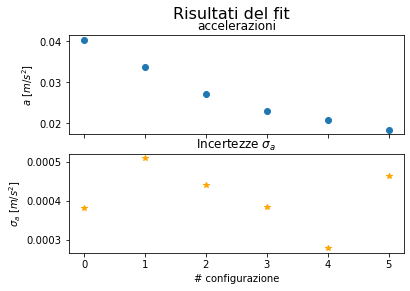

In [4]:
fig3, ax3 = plt.subplots(2, sharex = True)
ax3[0].plot(a, 'o')
ax3[0].set_title('accelerazioni')
ax3[0].set_ylabel('$a~[m/s^2]$')
ax3[1].plot(sigma_a, '*', color = 'orange')
ax3[1].set_title('Incertezze $\sigma_a$',)
ax3[1].set_ylabel('$\sigma_a~[m/s^2]$')
plt.xlabel('# configurazione')
fig3.suptitle('Risultati del fit', fontsize=16)

# Fit $\frac{1}{a}=A+Bn$
Consideriamo la propagazione delle incertezze per la funzione $y=1/a$, 

otteniamo: $\sigma_y=|\frac{\sigma_a}{a^2}|$

m         =  2.9728
sigma(m)  =  0.0869
c         =  18.7281
sigma(c)  =  0.6767
cov(m, c) =  -0.0528
rho(m, c) =  -0.8987
P-value Raw Fit: 13.54%
P-value Best Fit: 41.11%
chi2 Raw Fit: 7.01
chi2 Best Fit: 3.96


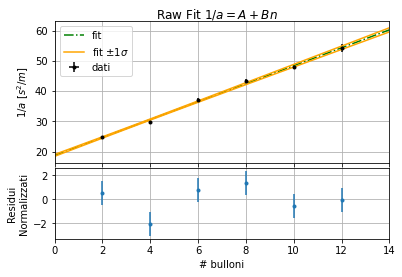

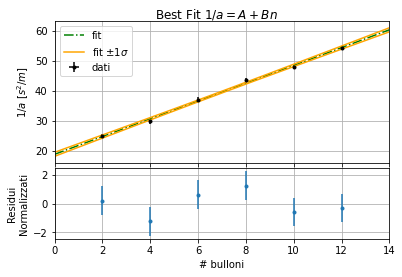

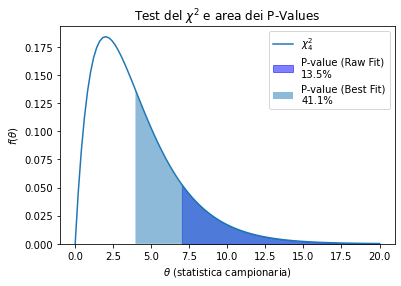

In [5]:
# Raw Fit (chiamo i risultati di questo fit con m1,sigma_m1,c1...)
n = np.array([2,4,6,8,10,12])
y = 1/a
sigma_y = abs(sigma_a/a**2)
m1, sigma_m1, c1, sigma_c1, cov1, rho1 = lf.lin_fit(n,y,sigma_y, res=True,verbose=False, xlabel='# bulloni', ylabel='$1/a~[s^2/m]$', title='Raw Fit $1/a=A+Bn$')


# Test del chi2
nu = 4
chi2_raw = np.sum(((y-m1*n-c1)/sigma_y)**2)
Pv_raw, trash = integrate.quad(chi2.pdf, chi2_raw, np.inf,args=[nu]) #trash è l'incertezza dovuta all'integrazione

#Poiché il P-Value è basso si decide di stimare a posteriori

# Stima posteriori
sigma_y_new_scalar = np.sqrt(np.sum((y-(m1*n+c1))**2)/4)
sigma_y_new = np.full(6, sigma_y_new_scalar)

# Best Fit (chiamo i risultati di questo fit con m2, sigma_m2, c2 ...)
m2, sigma_m2, c2, sigma_c2, cov2, rho2 = lf.lin_fit(n,y,sigma_y_new, res=True,verbose=True, xlabel='# bulloni', ylabel='$1/a~[s^2/m]$', title='Best Fit $1/a=A+Bn$')
chi2_best = np.sum(((y-m2*n-c2)/sigma_y_new)**2)
Pv_best, trash = integrate.quad(chi2.pdf, chi2_best, np.inf,args=[nu])


# Grafico chi2
plt.figure()
x = np.linspace(0,20,100)
plt.plot(x, chi2.pdf(x,df=nu), label = '$ \chi^2_4$')
plt.ylim(0)
plt.title('Test del $\chi^2$ e area dei P-Values')
x_color_raw = np.linspace(chi2_raw, 20, 100)
x_color_best = np.linspace(chi2_best, 20, 100)
plt.fill_between(x_color_raw, 0, chi2.pdf(x_color_raw, nu), label='P-value (Raw Fit)\n'+"{:.1%}".format(Pv_raw), alpha = 0.5, color = 'blue')
plt.fill_between(x_color_best, 0, chi2.pdf(x_color_best, nu), label='P-value (Best Fit)\n'+"{:.1%}".format(Pv_best), alpha = 0.5)
plt.xlabel('$\\theta$ (statistica campionaria)')
plt.ylabel('$f(\\theta)$')
plt.legend()
plt.savefig('fig5b/chi2.pdf')

# stampe
print("P-value Raw Fit: {:.2%}".format(Pv_raw))
print("P-value Best Fit: {:.2%}".format(Pv_best))
print("chi2 Raw Fit: {:.2f}".format(chi2_raw))
print("chi2 Best Fit: {:.2f}".format(chi2_best))
#non ho idea di quante cifre significative ci vadano per questi chi2

# Estrapolazione $I_0$ e $M_a$
- Massa singolo bullone
    - Dal momento che non siamo in condzioni di ripetibilità (ogni massa di ogni bullone è diversa), non possiamo usare la deviazione standard campionaria come incertezza sulla singola misura
    - Usiamo allora come incertezza sulla singola misura soltanto $\sigma_b = ris/\sqrt{12}$
    - Poiché l'incertezza sulla media va come $\bar{\sigma}=\frac{\sigma}{\sqrt{N}}$ e $N = 12$, stimiamo l'incertezza sulla massa media del bullone come $ris/12$
- Misura di r (raggio cilindro centrale)
    - Si stima $\sigma_d$ come $\sqrt{\left(\frac{S_{N-1}}{\sqrt{N}}\right)^2\left(\frac{ris}{\sqrt{12}}\right)^2 + \left(\frac{2 \Delta x}{\sqrt{12}}\right)^2}$, dove $\Delta_x$ è l'errore massimo, e $N=6$
    - $\sigma_r = \sigma_d/2$
- Misura di R (centro del volano-centro di massa del bullone)
    - Si stima R come $R=r+\rho+\frac{d_f}{2}$r, dove $\rho$ è la distanza la cilindro centrale al foro, mentre $d_f$ è il diametro del foro
- Misura di V
    - Si considera il disco di alluminio con densità 2.70 g/cm^3, ovvero 0.0027 g/mm^3
    - La distanza r_star (Rv-r) è quella dal cilindro centrale fino al bordo del disco e vale 186 mm
    - Rv è il vero raggio del disco e vale r+r_star. Serve soltanto per il calcolo del volume
    - s è lo spessore del disco, è stato misurato con il Nonio e quindi lo trattiamo come tale
- Misura di m
    - Si assume che il disco sia un oggetto di densità uniforme in alluminio, la densità dell'alluminio è presa come $2.70~g/cm^3$

In [13]:
# Misura massa singolo bullone
df1 = pd.read_csv('csv/data - 2.csv')
masse = df1['m(b)'].to_numpy()
conf = np.array([1,4,7,8,9,10,13,14,15,16,18,19])
mtot = 0
for i in range(12):
    mtot += masse[conf[i]-1]
m_b = mtot/12
sigma_m_b = 0.1/12

# Misura r
d = np.array([21.40,21.30,21.25,21.40,21.25])
sigma_d = quad(np.std(d,ddof= 1)/np.sqrt(d.size), 0.05/np.sqrt(12), (0.04*2)/np.sqrt(12)) #sigma_b è data dalla somma in quadratura di ris/radical(12) e 2err/radical(12)
r = np.mean(d)/2
sigma_r = sigma_d/2

# Misura R
rho = 160 #mm
d_f = 12.00 #mm
r_f = d_f/2 #mm
sigma_rho = 1/np.sqrt(12) #mm
sigma_d_f = quad(0.05/np.sqrt(12),(0.04*2)/np.sqrt(12)) #di fatto è uguale a sigma_d, ma non ci sono le incertezze di tipo A
sigma_r_f = sigma_d_f/2
R = r+rho+(d_f/2)
sigma_R = quad(sigma_r, sigma_rho, sigma_r_f)

#Misura di V
r_star = 186 #mm
sigma_r_star = 1/np.sqrt(12) #mm
Rv = r + r_star
sigma_Rv = quad(sigma_r, sigma_r_star)
s_arr = np.array([2.1,2.1,2.1]) # in realtà l'ultimo sarebbe 2.6
sigma_s = quad(np.std(s_arr,ddof= 1), 0.05/np.sqrt(12),(0.04*2)/np.sqrt(12))
s = np.mean(s_arr)
V = (s*Rv*Rv*np.pi)-12*(s*r_f*r_f*np.pi) #mm^3
sigma_V = quad(np.pi*(Rv**2-12*r_f**2)*sigma_s,
              2*np.pi*s*Rv*sigma_Rv,
              24*s*np.pi*r_f*sigma_r_f) #mm^3

m = V*2.7/1000 #g (densità alluminio in g/mm^3) 
sigma_m  = sigma_V*2.700/1000 #g


# Stampe
print("m_b: {:.4f} [g]".format(m_b), "sigma_m_b: {:.2g} [g]".format(sigma_m_b), "nu: {:.2%}".format(sigma_m_b/m_b), sep = '\t', end = ' <--\n')
print("r: {:.2f} [mm]".format(r), "sigma_r: {:.2g} [mm]".format(sigma_r), "nu: {:.2%}".format(sigma_r/r), sep = '   \t', end = ' <--\n')
print("rho: {:.2f} [mm]".format(rho), "sigma_rho: {:.2g} [mm]".format(sigma_rho), "nu: {:.2%}".format(sigma_rho/rho), sep = '   \t')
print("r_f: {:.3f} [mm]".format(d_f/2), "sigma_r_f: {:.2g} [mm]".format(sigma_r_f), "nu: {:.2%}".format(sigma_r_f/r_f), sep = '  \t')
print("R: {:.2f} [mm]".format(R), "sigma_R: {:.2g} [mm]".format(sigma_R), "nu: {:.2%}".format(sigma_R/R), sep = '   \t', end = ' <--\n')
print("s: {:.2f} [mm]".format(s), "sigma_s: {:.2g} [mm]".format(sigma_s), "nu: {:.2%}".format(sigma_s/s), sep = '    \t')
print("V: {:.0f} [cm^3]".format(V/1000), "sigma_V: {:.2g} [cm^3]".format(sigma_V/1000), "nu: {:.2%}".format(sigma_V/V), sep = '   \t')
print("m: {:.0f} [g]".format(m), "sigma_m: {:.2g} [g]".format(sigma_m), "nu: {:.2%}".format(sigma_m/m), sep = '       \t', end = ' <--\n')

m_b: 53.5167 [g]	sigma_m_b: 0.0083 [g]	nu: 0.02% <--
r: 10.66 [mm]   	sigma_r: 0.022 [mm]   	nu: 0.20% <--
rho: 160.00 [mm]   	sigma_rho: 0.29 [mm]   	nu: 0.18%
r_f: 6.000 [mm]  	sigma_r_f: 0.014 [mm]  	nu: 0.23%
R: 176.66 [mm]   	sigma_R: 0.29 [mm]   	nu: 0.16% <--
s: 2.10 [mm]    	sigma_s: 0.027 [mm]    	nu: 1.30%
V: 252 [cm^3]   	sigma_V: 3.4 [cm^3]   	nu: 1.33%
m: 681 [g]       	sigma_m: 9.1 [g]       	nu: 1.33% <--


Per il calcolo della propagazione delle incertezze su $M_a$ bisogna calcolare la $Cov[m,r]$, esiste poiché la formula di $m$ è $s\pi[(r^*+r)^2-12r_f^2]d$

Si prova a stimare la coviarianza per via campionaria, generando numeri random

15642.50468630903

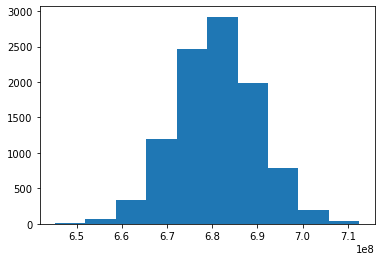

In [7]:
M = 10000
s_rand = np.random.normal(s, sigma_s, M)
r_star_rand = np.random.normal(r_star, sigma_r_star, M)
r_rand = np.random.normal(r,sigma_r, M)
r_f_rand = np.random.normal(r_f, sigma_r_f, M)
m_rand = s_rand*np.pi*(((r_star_rand+r_rand)**2)-12*r_f_rand**2)*2700 #ragiono in g/mm^3
x = np.linspace(m_rand.min(), m_rand.max(), 100)
plt.hist(m_rand)
y = M*norm.pdf(x, np.mean(m_rand), np.std(m_rand, ddof=1))


cov_m_r = (1/M)*np.sum((m_rand-np.mean(m_rand))*(r_rand-np.mean(r_rand)))
cov_m_r/(sigma_r*sigma_m)

In [14]:
A = c2
B = m2
sigma_A = sigma_c2
sigma_B = sigma_m2

# Propagazione delle incertezze

In [9]:
import sympy as sp
v, x2,x1, t1,t2,sigma_v,sigma_x1,sigma_x2, sigma_t1, sigma_t2 = sp.symbols('v, x2,x1, t1,t2,sigma_v,sigma_x1,sigma_x2, sigma_t1, sigma_t2')
v = (x2-x1)/(t2-t1)
sigma_v = quad(sp.diff(v,x2)*sigma_x2,
               sp.diff(v,x1)*sigma_x1,
               sp.diff(v,t2)*sigma_t2,
               sp.diff(v,t1)*sigma_t1)
sigma_v

(sigma_t1**2*(-x1 + x2)**2/(-t1 + t2)**4 + sigma_t2**2*(-x1 + x2)**2/(-t1 + t2)**4 + sigma_x1**2/(-t1 + t2)**2 + sigma_x2**2/(-t1 + t2)**2)**0.5

In [10]:
s, pi, R,r = sp.symbols('s, pi, R,r')
sigma_s, sigma_R, sigma_r = sp.symbols('sigma_s, sigma_R, sigma_r')

V = s*pi*(R**2-12*r**2)
sigma_V = quad(sp.diff(V, s)*sigma_s,
               sp.diff(V,R)*sigma_R,
               sp.diff(V,r)*sigma_r)
sigma_V

(4*R**2*pi**2*s**2*sigma_R**2 + 576*pi**2*r**2*s**2*sigma_r**2 + pi**2*sigma_s**2*(R**2 - 12*r**2)**2)**0.5

In [15]:
def getM_a(s, r, r_star, r_f, m_b, rho, B,sigma_s, sigma_r, sigma_r_star, sigma_r_f, sigma_m_b, sigma_rho, sigma_B):
    _pi, _d, _g = sp.symbols('pi, d,g')
    _s, _r, _r_star, _r_f, _m_b, _rho, _B =sp.symbols('s, r, r^*, r_f, m_b, rho, B ')
    _sigma_s, _sigma_r, _sigma_r_star, _sigma_r_f, _sigma_m_b, _sigma_rho, _sigma_B  = sp.symbols('sigma_s, sigma_r, sigma_r^*, sigma_r_f, sigma_m_b, sigma_rho, sigma_B')
    _M_a, _sigma_M_a = sp.symbols('M_a, sigma_M_a')
    _M_a = _s*_pi*_d*_g*_r*(((_r_star+_r)**2)-12*(_r_f**2)) - (2*_m_b*((_r+_rho+_r_f)**2))/(_B*_r)
    _sigma_M_a = quad(sp.diff(_M_a,_s)*_sigma_s,
                      sp.diff(_M_a,_r)*_sigma_r,
                      sp.diff(_M_a,_r_star)*_sigma_r_star,
                      sp.diff(_M_a,_r_f)*_sigma_r_f,
                      sp.diff(_M_a,_m_b)*_sigma_m_b,
                      sp.diff(_M_a,_rho)*_sigma_rho,
                      sp.diff(_M_a,_B)*_sigma_B)

    M_a = _M_a.subs([(_pi,np.pi),(_d,2.70/1000),(_g,9.805),(_s,s),(_r,r),(_r_star,r_star),(_r_f,r_f),(_m_b,m_b),(_rho,rho),(_B,B)])
    sigma_M_a = _sigma_M_a.subs([(_pi,np.pi),(_d,2.70/1000),(_g,9.805),(_s,s),(_r,r),(_r_star,r_star),(_r_f,r_f),(_m_b,m_b),(_rho,rho),(_B,B),
                                 (_sigma_s,sigma_s),(_sigma_r,sigma_r),(_sigma_r_star,sigma_r_star),(_sigma_r_f,sigma_r_f),(_sigma_m_b,sigma_m_b),
                                 (_sigma_rho,sigma_rho),(_sigma_B, sigma_B)])
    #Nonostante i risulati di sopra di V siano espressi in cm^3, il notebook ha comunque lavorato sempre in g/mm^3
    #La conversione g->Kg avviene ora, insieme a far diventare le espresisoni di sympy dei float di Python
    M_a = float(M_a)/1000 #M_a in questo caso è espresso in g*m^2/s^2, ci serve in N*m 
    sigma_M_a = float(sigma_M_a)/1000 # M_a in questo caso è espresso in g*m^2/s^2, ci serve in N*m 
    
    latex1 = sp.latex(_M_a)
    latex2 = sp.latex(sp.simplify(_sigma_M_a))
    return M_a, sigma_M_a, latex1, latex2
result1,result2, result3,result4 = lb.getM_a(s, r, r_star, r_f, m_b, rho, B,sigma_s, sigma_r, sigma_r_star, sigma_r_f, sigma_m_b, sigma_rho, sigma_B)

$d g \pi r s \left(- 12 r_{f}^{2} + \left(r + r^{*}\right)^{2}\right) - \frac{2 m_{b} \left(r + r_{f} + \rho\right)^{2}}{B r}$